In [12]:
import re
import networkx as nx

In [13]:
import pandas as pd
df = pd.read_csv('산업재해보상보험.csv', encoding='utf-8')
# galexy_posts = df.get('Title') + " " + df.get('Description')
# galexy_post_date = df.get('Post Date')

In [14]:
df

,인덱스,URL 주소,댓글작성자명,댓글작성일자,댓글 내용
0,0,https://www.youtube.com//watch?v=iDtglrj7Whg,조군,10개월 전(수정됨),산재보험 참 좋은거 같아요 저는 작년 12월 출근길에 빙판에 넘어져 발목 뼈3개 골...
1,1,https://www.youtube.com//watch?v=iDtglrj7Whg,ju hee,10개월 전(수정됨),안녕하세요 제가 일하다가 미끄러운돌을 밟아서 넘어져서 무릎전방십자인대가 끊어져서 수...
2,2,https://www.youtube.com//watch?v=iDtglrj7Whg,박수진,4일 전,제조공장을 운영즁 전남편이 공장화재로 사고사했어요..대표자는 저이고~전남편...
3,3,https://www.youtube.com//watch?v=iDtglrj7Whg,손성환,4일 전,일하다가 작업도중에 타카쏘다 손에 관통해서 손톱이 빠져서 병원에서 몇일쉬어야한다고...
4,4,https://www.youtube.com//watch?v=iDtglrj7Whg,J K,1개월 전,4년전에 작업도중 발목이 삐었었는데 그 당시에는 반깁스하고 휴가철이라 그냥 쉬고 말...
...,...,...,...,...,...
746,746,https://www.youtube.com//watch?v=yLCpOt0pm1M,사계절,1개월 전,사업자관리번호가.조회가안되요 알려도안줘요 어떻게 해야 할까요
747,747,https://www.youtube.com//watch?v=yLCpOt0pm1M,김정숙,1개월 전,저는 요양보호 종사자인데요올초 3월달에야간근무중 계단에서넘어져 손목골절입었는...
748,748,https://www.youtube.com//watch?v=GnO7w2UKNQQ,반만디젤,10개월 전,고용산재보험 있으나 마나 아니냐 어디서 개구라를 치고 있나
749,749,https://www.youtube.com//watch?v=LLa-0r_4PJU,캄캄우유유,1주 전(수정됨),아오 산재 때문에 짜증 남일을 하던 안 하던 그리고 수익이 많지도 않는데. 떼 가는...


In [15]:
df1 = df['댓글 내용']

In [16]:
df1

0      산재보험 참 좋은거 같아요 저는 작년 12월 출근길에 빙판에 넘어져 발목 뼈3개 골...
1      안녕하세요 제가 일하다가 미끄러운돌을 밟아서 넘어져서 무릎전방십자인대가 끊어져서 수...
2      제조공장을  운영즁  전남편이  공장화재로  사고사했어요..대표자는  저이고~전남편...
3      일하다가 작업도중에 타카쏘다  손에 관통해서 손톱이 빠져서 병원에서 몇일쉬어야한다고...
4      4년전에 작업도중 발목이 삐었었는데 그 당시에는 반깁스하고 휴가철이라 그냥 쉬고 말...
                             ...                        
746                    사업자관리번호가.조회가안되요 알려도안줘요 어떻게 해야 할까요
747    저는  요양보호 종사자인데요올초  3월달에야간근무중  계단에서넘어져  손목골절입었는...
748                     고용산재보험 있으나 마나 아니냐 어디서 개구라를 치고 있나
749    아오 산재 때문에 짜증 남일을 하던 안 하던 그리고 수익이 많지도 않는데. 떼 가는...
750                     배달대행 근로자입니다 관리감독합니다 특히 요기요플러스!!!
Name: 댓글 내용, Length: 751, dtype: object

In [17]:
message = []

for i in df1:
    message.append(i)

In [18]:
message

['산재보험 참 좋은거 같아요 저는 작년 12월 출근길에 빙판에 넘어져 발목 뼈3개 골절 되어 핀박는 수술 했는대요집에서 출발해서 5분정도 내려와서 사고가 났는대   출근길에 사고도 산재처리가 되더군요 8개월동안 요양 하면서 휴업급여.수술비 .치료비 모두 산재에서 받았습니다 그리고 산재치료가 끝나고 후유장해라는 보상제도 있어 산재에서 후유장해 보상금도 따로 받았습니다후유장해보상은 따로 근로복지공단에서 심사가 필요합니다',
 '안녕하세요 제가 일하다가 미끄러운돌을 밟아서 넘어져서 무릎전방십자인대가 끊어져서 수술을 했고 산재를 처리했고 한달이 다되어가는데 무릎수술후 허리가 계속 아프고 오래 못앉아있겠어서 허리쪽으로도 문제가 있었던것같아서 따로 처리를 할수있는건지 여쭤보려고요ㅠㅠㅠㅠ',
 '제조공장을  운영즁  전남편이  공장화재로  사고사했어요..대표자는  저이고~전남편이  거친직종특성상  도와줬었습니다산재신청가능할까요?이혼은  2014년에  협의이혼했었습니다남편외도로...',
 '일하다가 작업도중에 타카쏘다  손에 관통해서 손톱이 빠져서 병원에서 몇일쉬어야한다고 하는데 입원을해야만 산재처리가 되는건가요?병원에서는 당분간 일  나가지말라고하는데 생계유지때문에 일을 나가야하는데..답답하네요 .. 욱신거려서 아픈데 보상이  하나도없어서..',
 '4년전에 작업도중 발목이 삐었었는데 그 당시에는 반깁스하고 휴가철이라 그냥 쉬고 말았습니다 그런데 작년쯤 다시 아프기시작해서 한의원에 다녔는데요 너무 아파서 통증의학과에 가봤더니 발목에 뼛조각이 있더라구요~ 비골하부골 수술을 해야한다는데 4년지나고도 산재신청 가능할까요??처음 다쳤을 당시에는 뼈조각이 있단말을 듣지못했는데 찾아보니 그렇게 삔 경험이 있을 때 시간이지나서 나타날수도 있는것같더라구요~ 3년지나면 무조건 신청 못하는걸까요??',
 '제가 원하는 영상입니다. ㅜㅜㅜ 올려주셔서 감사합니다. 바로 구독누르고 갑니다~',
 '노무사님,,저희 아버지가 일하시다가 돌아가셨는데 유족이 근로복지공단가서 신청을 하면될까요? 제가 

In [19]:
import konlpy
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.rc('font', family= 'NanumGothic')
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [20]:
text = ' '.join(df['댓글 내용'])

okt = Okt()
san_noun = okt.nouns(text)
len(san_noun)

16492

In [21]:
san_noun

['산재',
 '보험',
 '거',
 '저',
 '작년',
 '출근길',
 '빙판',
 '발목',
 '뼈',
 '개',
 '골절',
 '핀',
 '수술',
 '집',
 '출발',
 '사고',
 '출근길',
 '사고',
 '산재',
 '처리',
 '개',
 '월동',
 '안',
 '요양',
 '휴업',
 '급여',
 '수술',
 '비',
 '치료',
 '비',
 '모두',
 '산재',
 '산재',
 '치료',
 '후유',
 '장해',
 '보상',
 '제도',
 '산재',
 '후유',
 '장해',
 '보상금',
 '후유',
 '장해',
 '보상',
 '근로',
 '복지',
 '공단',
 '심사',
 '제',
 '일',
 '돌',
 '무릎',
 '전방',
 '자인',
 '수술',
 '산재',
 '처리',
 '달이',
 '무릎',
 '수술',
 '후',
 '허리',
 '계속',
 '허리',
 '쪽',
 '문제',
 '처리',
 '공장',
 '운영',
 '즁',
 '전남편',
 '공장화재',
 '사고',
 '대표자',
 '저',
 '전남편',
 '직종',
 '특성',
 '산재',
 '신청',
 '요',
 '이혼',
 '협의',
 '이혼',
 '남편',
 '외도',
 '일',
 '업도',
 '타카',
 '손',
 '관통',
 '손톱',
 '병원',
 '쉬',
 '입원',
 '산재',
 '처리',
 '가요',
 '병원',
 '당분간',
 '일',
 '생계',
 '유지',
 '때문',
 '일',
 '나가야',
 '욱신거려',
 '보상',
 '하나',
 '작업',
 '도중',
 '발목',
 '삐었었는데',
 '그',
 '당시',
 '깁스',
 '휴가',
 '철',
 '그냥',
 '쉬',
 '작년',
 '다시',
 '시작',
 '한의원',
 '통증',
 '의학과',
 '발목',
 '뼛조각',
 '비골',
 '부골',
 '수술',
 '산재',
 '신청',
 '요',
 '처음',
 '당시',
 '뼈',
 '조각',
 '단말',
 '삔',
 '경험',
 '때',
 '시간',
 '이지

In [22]:
# 한글자 제거
san_noun = [i for i in san_noun if len(i)>=2]
len(san_noun)

13117

In [23]:
count = Counter(san_noun)
noun_list= count.most_common(100)
noun_list[:10]

[('산재', 534),
 ('보험', 256),
 ('회사', 240),
 ('신청', 180),
 ('처리', 161),
 ('보상', 132),
 ('급여', 128),
 ('치료', 124),
 ('병원', 121),
 ('사고', 111)]

In [24]:
noun_list_rm = []

for i in range(len(noun_list)):
    if noun_list[i][0] not in['근로', '복지', '공단']:
        noun_list_rm.append(noun_list[i])
        
noun_list_rm[:10]


[('산재', 534),
 ('보험', 256),
 ('회사', 240),
 ('신청', 180),
 ('처리', 161),
 ('보상', 132),
 ('급여', 128),
 ('치료', 124),
 ('병원', 121),
 ('사고', 111)]

In [25]:
noun_list_rm

[('산재', 534),
 ('보험', 256),
 ('회사', 240),
 ('신청', 180),
 ('처리', 161),
 ('보상', 132),
 ('급여', 128),
 ('치료', 124),
 ('병원', 121),
 ('사고', 111),
 ('수술', 107),
 ('지금', 71),
 ('영상', 70),
 ('해고', 70),
 ('정보', 69),
 ('근로자', 69),
 ('재해', 64),
 ('경우', 64),
 ('진단', 63),
 ('승인', 62),
 ('사람', 61),
 ('대해', 54),
 ('업무', 54),
 ('골절', 53),
 ('노무사', 53),
 ('입원', 51),
 ('정도', 51),
 ('사업', 51),
 ('휴업', 50),
 ('출근', 48),
 ('장애', 48),
 ('가요', 46),
 ('부분', 46),
 ('상태', 45),
 ('가입', 45),
 ('손가락', 45),
 ('현장', 45),
 ('도움', 43),
 ('현재', 43),
 ('과실', 42),
 ('요양', 41),
 ('장해', 41),
 ('기간', 41),
 ('산업', 41),
 ('생각', 40),
 ('상담', 36),
 ('상황', 36),
 ('지급', 35),
 ('그냥', 34),
 ('근무', 34),
 ('선생님', 34),
 ('개월', 34),
 ('청구', 34),
 ('증거', 33),
 ('내용', 32),
 ('질문', 32),
 ('교통사고', 32),
 ('계속', 31),
 ('저희', 31),
 ('보고', 31),
 ('적용', 31),
 ('질병', 31),
 ('본인', 31),
 ('바로', 30),
 ('자동차', 30),
 ('정말', 29),
 ('접수', 29),
 ('감사', 29),
 ('이번', 29),
 ('방법', 29),
 ('임금', 29),
 ('작업', 28),
 ('다시', 28),
 ('시간', 28),
 ('구독', 28),
 ('아버지'

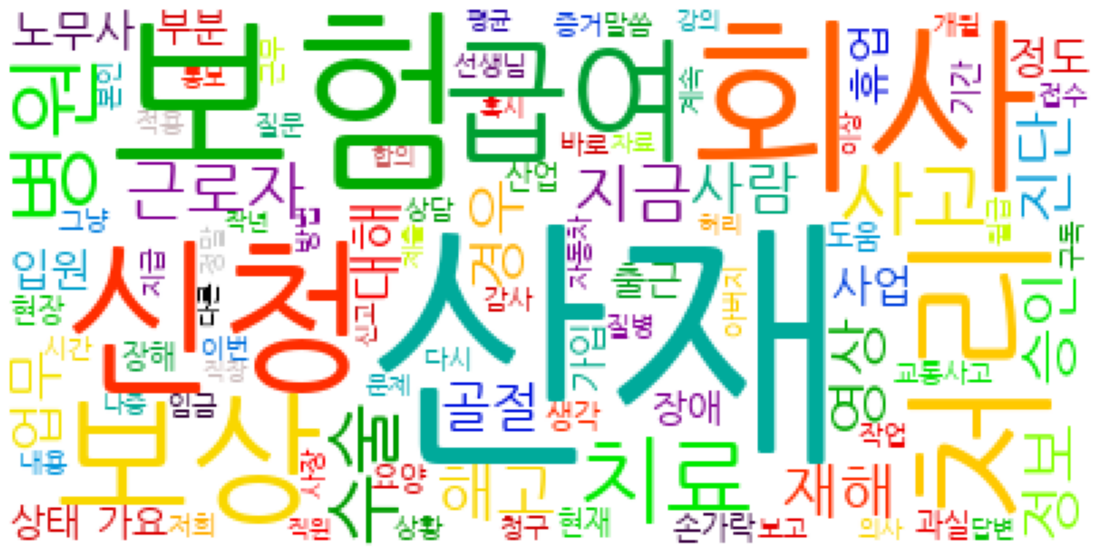

In [26]:
wordcloud = WordCloud(font_path="C:/Windows/Fonts/NanumGothic.ttf",
                     background_color ='white',
                     max_words =100,
                     colormap='nipy_spectral').generate_from_frequencies(dict(noun_list_rm))


fig = plt.figure(figsize=(20,10))

plt.axis('off')
plt.imshow(wordcloud)





In [27]:
from eunjeon import Mecab
tagger = Mecab()

galexy_stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 중 북 수 팩 년 월 저 탭"
galexy_stop_words = galexy_stop_words.split(' ')
galexy_stop_words[0:10]

ModuleNotFoundError: No module named 'eunjeon'

In [28]:
galexy_nouns = []
for post in galexy_posts:
    for noun in tagger.nouns(post):
        if noun not in galexy_stop_words:
            galexy_nouns.append(noun)
            
galexy_nouns[0:10]

NameError: name 'galexy_posts' is not defined

In [29]:
noun_list_rm[0:10]

[('산재', 534),
 ('보험', 256),
 ('회사', 240),
 ('신청', 180),
 ('처리', 161),
 ('보상', 132),
 ('급여', 128),
 ('치료', 124),
 ('병원', 121),
 ('사고', 111)]

In [30]:
san_noun2=[]
for i,j in noun_list_rm:
    san_noun2.append(i)
    
san_noun2[0:10]

['산재', '보험', '회사', '신청', '처리', '보상', '급여', '치료', '병원', '사고']

In [31]:
from collections import Counter
num_top_nouns = 20
san_nouns_counter = Counter(san_noun)

san_top_nouns_100 = dict(san_nouns_counter.most_common(num_top_nouns))


san_top_nouns_100 # 딕셔너리로 만들고 


{'산재': 534,
 '보험': 256,
 '회사': 240,
 '신청': 180,
 '처리': 161,
 '보상': 132,
 '급여': 128,
 '치료': 124,
 '병원': 121,
 '사고': 111,
 '수술': 107,
 '지금': 71,
 '영상': 70,
 '해고': 70,
 '정보': 69,
 '근로자': 69,
 '재해': 64,
 '경우': 64,
 '진단': 63,
 '승인': 62}

In [32]:
galexy_sentences = []
for post in galexy_posts:
    galexy_sentences.extend(re.split('; |\.|\?|\!', post))
galexy_sentences[0:10]

NameError: name 'galexy_posts' is not defined

In [33]:
san_sentences = []
for post in df['댓글 내용']:
    san_sentences.extend(re.split('; |\.|\?|\!', post))
san_sentences[0:10]

['산재보험 참 좋은거 같아요 저는 작년 12월 출근길에 빙판에 넘어져 발목 뼈3개 골절 되어 핀박는 수술 했는대요집에서 출발해서 5분정도 내려와서 사고가 났는대   출근길에 사고도 산재처리가 되더군요 8개월동안 요양 하면서 휴업급여',
 '수술비 ',
 '치료비 모두 산재에서 받았습니다 그리고 산재치료가 끝나고 후유장해라는 보상제도 있어 산재에서 후유장해 보상금도 따로 받았습니다후유장해보상은 따로 근로복지공단에서 심사가 필요합니다',
 '안녕하세요 제가 일하다가 미끄러운돌을 밟아서 넘어져서 무릎전방십자인대가 끊어져서 수술을 했고 산재를 처리했고 한달이 다되어가는데 무릎수술후 허리가 계속 아프고 오래 못앉아있겠어서 허리쪽으로도 문제가 있었던것같아서 따로 처리를 할수있는건지 여쭤보려고요ㅠㅠㅠㅠ',
 '제조공장을  운영즁  전남편이  공장화재로  사고사했어요',
 '',
 '대표자는  저이고~전남편이  거친직종특성상  도와줬었습니다산재신청가능할까요',
 '이혼은  2014년에  협의이혼했었습니다남편외도로',
 '',
 '']

In [34]:
san_sentences_nouns = []
for sentence in san_sentences:
    okt = Okt()
    #san_noun = okt.nouns(text)
    sentence_nouns = okt.nouns(sentence)
    san_sentences_nouns.append(sentence_nouns)
san_sentences_nouns[0:10]

[['산재',
  '보험',
  '거',
  '저',
  '작년',
  '출근길',
  '빙판',
  '발목',
  '뼈',
  '개',
  '골절',
  '핀',
  '수술',
  '집',
  '출발',
  '사고',
  '출근길',
  '사고',
  '산재',
  '처리',
  '개',
  '월동',
  '안',
  '요양',
  '휴업',
  '급여'],
 ['수술', '비'],
 ['치료',
  '비',
  '모두',
  '산재',
  '산재',
  '치료',
  '후유',
  '장해',
  '보상',
  '제도',
  '산재',
  '후유',
  '장해',
  '보상금',
  '후유',
  '장해',
  '보상',
  '근로',
  '복지',
  '공단',
  '심사'],
 ['제',
  '일',
  '돌',
  '무릎',
  '전방',
  '자인',
  '수술',
  '산재',
  '처리',
  '달이',
  '무릎',
  '수술',
  '후',
  '허리',
  '계속',
  '허리',
  '쪽',
  '문제',
  '처리'],
 ['공장', '운영', '즁', '전남편', '공장화재', '사고'],
 [],
 ['대표자', '저', '전남편', '직종', '특성', '산재', '신청', '요'],
 ['이혼', '협의', '이혼', '남편', '외도'],
 [],
 []]

In [35]:
# san_sentences_nouns = []
# for sentence in san_sentences:
#     sentence_nouns = tagger.nouns(sentence)
#     galexy_sentences_nouns.append(sentence_nouns)
# galexy_sentences_nouns[0:10]

In [36]:
san_noun

['산재',
 '보험',
 '작년',
 '출근길',
 '빙판',
 '발목',
 '골절',
 '수술',
 '출발',
 '사고',
 '출근길',
 '사고',
 '산재',
 '처리',
 '월동',
 '요양',
 '휴업',
 '급여',
 '수술',
 '치료',
 '모두',
 '산재',
 '산재',
 '치료',
 '후유',
 '장해',
 '보상',
 '제도',
 '산재',
 '후유',
 '장해',
 '보상금',
 '후유',
 '장해',
 '보상',
 '근로',
 '복지',
 '공단',
 '심사',
 '무릎',
 '전방',
 '자인',
 '수술',
 '산재',
 '처리',
 '달이',
 '무릎',
 '수술',
 '허리',
 '계속',
 '허리',
 '문제',
 '처리',
 '공장',
 '운영',
 '전남편',
 '공장화재',
 '사고',
 '대표자',
 '전남편',
 '직종',
 '특성',
 '산재',
 '신청',
 '이혼',
 '협의',
 '이혼',
 '남편',
 '외도',
 '업도',
 '타카',
 '관통',
 '손톱',
 '병원',
 '입원',
 '산재',
 '처리',
 '가요',
 '병원',
 '당분간',
 '생계',
 '유지',
 '때문',
 '나가야',
 '욱신거려',
 '보상',
 '하나',
 '작업',
 '도중',
 '발목',
 '삐었었는데',
 '당시',
 '깁스',
 '휴가',
 '그냥',
 '작년',
 '다시',
 '시작',
 '한의원',
 '통증',
 '의학과',
 '발목',
 '뼛조각',
 '비골',
 '부골',
 '수술',
 '산재',
 '신청',
 '처음',
 '당시',
 '조각',
 '단말',
 '경험',
 '시간',
 '이지나',
 '무조건',
 '신청',
 '영상',
 '바로',
 '구독',
 '노무사',
 '저희',
 '아버지',
 '유족',
 '근로',
 '복지',
 '단가',
 '신청',
 '형편',
 '무료',
 '상담',
 '출근',
 '작업장',
 '다가',
 '계단',
 '요추',
 '골절',
 '산재',
 '처리',
 '댓글

In [37]:
san_word2id = {w: i for i, w in enumerate(san_top_nouns_100.keys())}
san_word2id

{'산재': 0,
 '보험': 1,
 '회사': 2,
 '신청': 3,
 '처리': 4,
 '보상': 5,
 '급여': 6,
 '치료': 7,
 '병원': 8,
 '사고': 9,
 '수술': 10,
 '지금': 11,
 '영상': 12,
 '해고': 13,
 '정보': 14,
 '근로자': 15,
 '재해': 16,
 '경우': 17,
 '진단': 18,
 '승인': 19}

In [38]:
san_id2word = {i: w for i, w in enumerate(san_top_nouns_100.keys())}
san_id2word

{0: '산재',
 1: '보험',
 2: '회사',
 3: '신청',
 4: '처리',
 5: '보상',
 6: '급여',
 7: '치료',
 8: '병원',
 9: '사고',
 10: '수술',
 11: '지금',
 12: '영상',
 13: '해고',
 14: '정보',
 15: '근로자',
 16: '재해',
 17: '경우',
 18: '진단',
 19: '승인'}

In [99]:
san_word2id

{'산재': 0,
 '보험': 1,
 '회사': 2,
 '신청': 3,
 '처리': 4,
 '보상': 5,
 '급여': 6,
 '치료': 7,
 '병원': 8,
 '사고': 9,
 '수술': 10,
 '지금': 11,
 '영상': 12,
 '해고': 13,
 '정보': 14,
 '근로자': 15,
 '재해': 16,
 '경우': 17,
 '진단': 18,
 '승인': 19}

In [39]:
import numpy as np
san_adjacent_matrix = np.zeros((num_top_nouns, num_top_nouns), int)
for sentence in san_sentences_nouns:
    for wi, i in san_word2id.items():
        if wi in sentence:
            for wj, j in san_word2id.items():
                if i != j and wj in sentence:
                    san_adjacent_matrix[i][j] += 1
san_adjacent_matrix

array([[  0, 115,  80,  90, 111,  40,  37,  54,  44,  48,  34,  26,  15,
          3,   5,  15,  12,  27,  19,  29],
       [115,   0,  31,  22,  31,  31,  24,   9,   9,  17,   9,   7,   6,
          2,   1,  17,  23,  12,   4,   1],
       [ 80,  31,   0,  28,  29,  15,   9,  25,  17,  17,  15,  15,   8,
         12,   2,   9,   5,   8,   2,  13],
       [ 90,  22,  28,   0,  10,   8,  19,  16,  15,  11,  17,  10,   5,
          4,   3,   4,   8,  11,  12,   7],
       [111,  31,  29,  10,   0,   7,   8,  10,  19,  14,  11,   8,   3,
          1,   0,   3,   5,  10,   6,   5],
       [ 40,  31,  15,   8,   7,   0,  13,   9,   4,   8,   3,   7,   3,
          3,   3,   7,  24,   6,   2,   0],
       [ 37,  24,   9,  19,   8,  13,   0,  13,   7,   5,   7,   5,   2,
          0,   1,   6,   7,   9,   1,   6],
       [ 54,   9,  25,  16,  10,   9,  13,   0,  22,   8,  13,  16,   2,
          1,   0,   4,   0,   2,   7,  10],
       [ 44,   9,  17,  15,  19,   4,   7,  22,   0,   1,  16,  

In [40]:
san_network = nx.from_numpy_matrix(san_adjacent_matrix)
list(san_network.adjacency())

[(0,
  {1: {'weight': 115},
   2: {'weight': 80},
   3: {'weight': 90},
   4: {'weight': 111},
   5: {'weight': 40},
   6: {'weight': 37},
   7: {'weight': 54},
   8: {'weight': 44},
   9: {'weight': 48},
   10: {'weight': 34},
   11: {'weight': 26},
   12: {'weight': 15},
   13: {'weight': 3},
   14: {'weight': 5},
   15: {'weight': 15},
   16: {'weight': 12},
   17: {'weight': 27},
   18: {'weight': 19},
   19: {'weight': 29}}),
 (1,
  {0: {'weight': 115},
   2: {'weight': 31},
   3: {'weight': 22},
   4: {'weight': 31},
   5: {'weight': 31},
   6: {'weight': 24},
   7: {'weight': 9},
   8: {'weight': 9},
   9: {'weight': 17},
   10: {'weight': 9},
   11: {'weight': 7},
   12: {'weight': 6},
   13: {'weight': 2},
   14: {'weight': 1},
   15: {'weight': 17},
   16: {'weight': 23},
   17: {'weight': 12},
   18: {'weight': 4},
   19: {'weight': 1}}),
 (2,
  {0: {'weight': 80},
   1: {'weight': 31},
   3: {'weight': 28},
   4: {'weight': 29},
   5: {'weight': 15},
   6: {'weight': 9},
  

In [100]:
nx.Graph?

In [41]:
# import matplotlib.pyplot as plt
# from matplotlib import font_manager as fm
# from matplotlib import rc

# font_path="./font/NanumBarunGothic.ttf"
# font_name = fm.FontProperties(fname=font_path).get_name()
# rc('font', family=font_name)

# fig = plt.figure()
# fig.set_size_inches(20, 20)
# ax = fig.add_subplot(1, 1, 1)
# ax.axis("off")
# option = {
#     'node_color' : 'lightblue',
#     'node_size' : 2000,
#     'size' : 2
# }
# nx.draw(galexy_network, labels=galexy_id2word, font_family=font_name, ax=ax, **option)

In [42]:
# fig = plt.figure()
# fig.set_size_inches(20, 20)
# option = {
#     'node_color' : 'lightblue',
#     'node_size' : 500,
#     'size' : 100
# }

# plt.subplot(221)
# plt.title('Random Layout', fontsize=20)
# nx.draw_random(galexy_network, labels=galexy_id2word, font_family=font_name, **option)
# plt.subplot(222)
# plt.title('Circular Layout', fontsize=20)
# nx.draw_circular(galexy_network, labels=galexy_id2word, font_family=font_name, **option)
# plt.subplot(223)
# plt.title('Spectral Layout',fontsize=20)
# nx.draw_spectral(galexy_network, labels=galexy_id2word, font_family=font_name, **option)
# plt.subplot(224)
# plt.title('Spring Layout',fontsize=20)
# nx.draw_spring(galexy_network, labels=galexy_id2word, font_family=font_name, **option)

In [43]:
import matplotlib.font_manager as fm

from matplotlib import rc

font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)




In [44]:
nx.draw_networkx_labels?

In [45]:
nx.draw_networkx_labels(G1,san_top_nouns_100,san_top_nouns_100.items,font_family=font_name,font_size=10)


NameError: name 'G1' is not defined

In [51]:
san_id2word

{0: '산재',
 1: '보험',
 2: '회사',
 3: '신청',
 4: '처리',
 5: '보상',
 6: '급여',
 7: '치료',
 8: '병원',
 9: '사고',
 10: '수술',
 11: '지금',
 12: '영상',
 13: '해고',
 14: '정보',
 15: '근로자',
 16: '재해',
 17: '경우',
 18: '진단',
 19: '승인'}

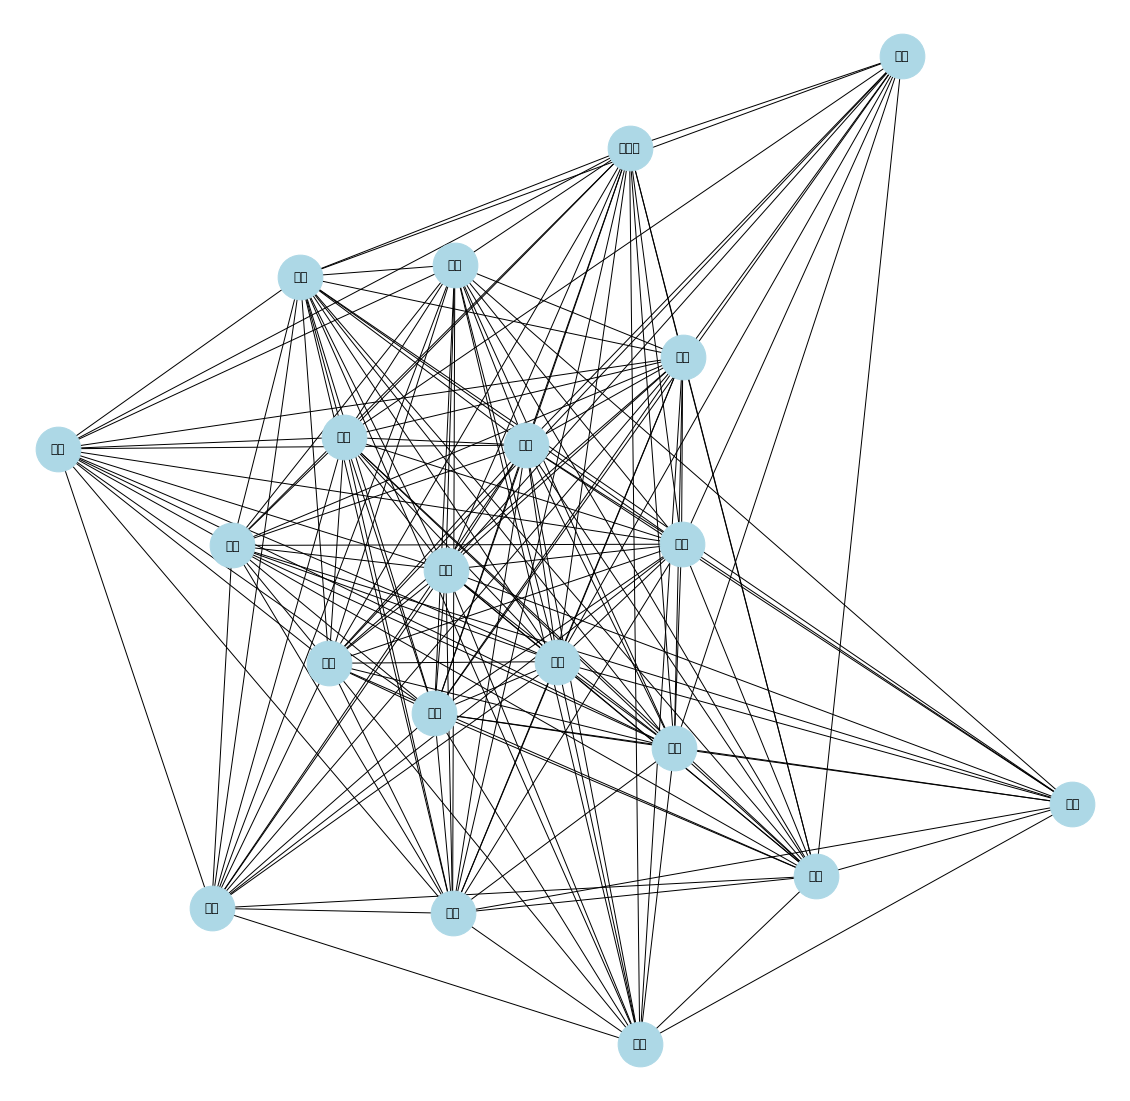

In [68]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="./font/NanumBarunGothic.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

In [60]:
G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
G1

In [80]:
san_word2id

{'산재': 0,
 '보험': 1,
 '회사': 2,
 '신청': 3,
 '처리': 4,
 '보상': 5,
 '급여': 6,
 '치료': 7,
 '병원': 8,
 '사고': 9,
 '수술': 10,
 '지금': 11,
 '영상': 12,
 '해고': 13,
 '정보': 14,
 '근로자': 15,
 '재해': 16,
 '경우': 17,
 '진단': 18,
 '승인': 19}

In [82]:
print(nx.info(G1))

Name: 
Type: Graph
Number of nodes: 20
Number of edges: 170
Average degree:  17.0000


In [81]:
G2=nx.Graph(san_network, labels=san_word2id, font_family=font_name, ax=ax)
G2

In [95]:
labels=[]

for i in san_word2id.keys():
    labels.append(i)

labels

['산재',
 '보험',
 '회사',
 '신청',
 '처리',
 '보상',
 '급여',
 '치료',
 '병원',
 '사고',
 '수술',
 '지금',
 '영상',
 '해고',
 '정보',
 '근로자',
 '재해',
 '경우',
 '진단',
 '승인']

In [89]:
# nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax,**option)
# plt.show()

In [96]:
G3=nx.Graph(san_network, labels=labels, font_family=font_name, ax=ax)
G3

In [ ]:
G4=nx.Graph(san_network, labels=labels, font_family=font_name, ax=ax)
G4

In [101]:
font_name

'NanumBarunGothic'

In [102]:
nx.Graph?

In [65]:
print(nx.info(G1))

Name: 
Type: Graph
Number of nodes: 20
Number of edges: 170
Average degree:  17.0000


In [90]:
print(nx.info(G2))

Name: 
Type: Graph
Number of nodes: 20
Number of edges: 170
Average degree:  17.0000


In [97]:
print(nx.info(G3))

Name: 
Type: Graph
Number of nodes: 20
Number of edges: 170
Average degree:  17.0000


In [91]:
nx.write_gexf(G2, 'gg2.gexf')

In [98]:
nx.write_gexf(G2, 'gg3.gexf')

In [104]:
G55= nx.Graph()
G55

In [108]:
G55.add_nodes_from(labels)

In [111]:
G55=nx.Graph(san_network)
G55.add_nodes_from(labels)

In [114]:
print(nx.info(G55))

Name: 
Type: Graph
Number of nodes: 20
Number of edges: 170
Average degree:  17.0000


In [115]:
nx.write_gexf(G55, 'gg55.gexf')

In [116]:
G66=nx.Graph(san_network)
G66.add_nodes_from(labels)
print(nx.info(G66))
nx.write_gexf(G66, 'gg66.gexf')

Name: 
Type: Graph
Number of nodes: 40
Number of edges: 170
Average degree:   8.5000


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


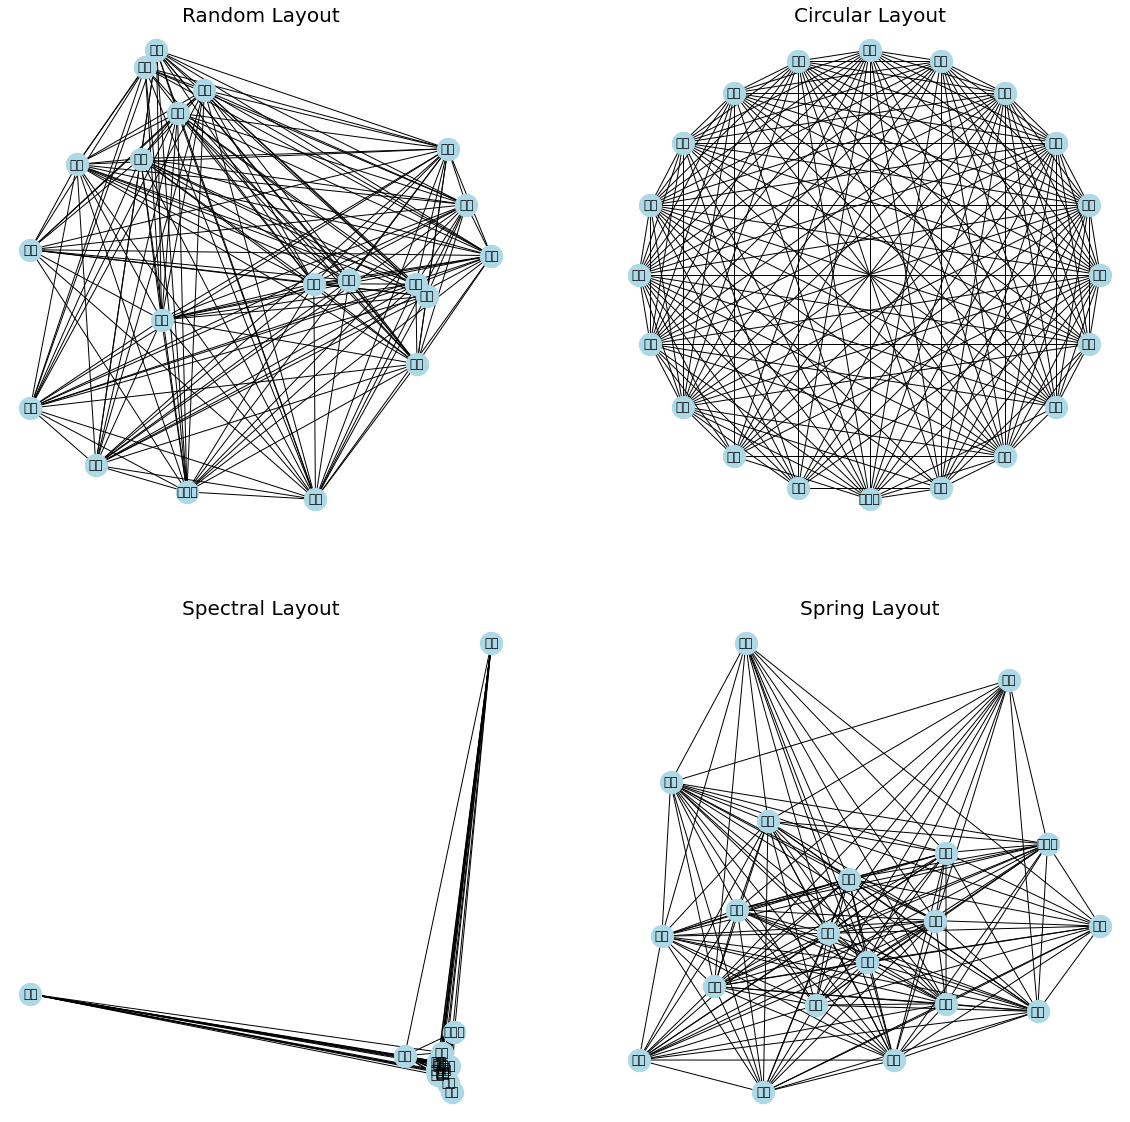

In [47]:
fig = plt.figure()
fig.set_size_inches(20, 20)
option = {
    'node_color' : 'lightblue',
    'node_size' : 500,
    'size' : 100
}

plt.subplot(221)
plt.title('Random Layout', fontsize=20)
nx.draw_random(san_network, labels=san_id2word, font_family=font_name, **option)
plt.subplot(222)
plt.title('Circular Layout', fontsize=20)
nx.draw_circular(san_network, labels=san_id2word, font_family=font_name, **option)
plt.subplot(223)
plt.title('Spectral Layout',fontsize=20)
nx.draw_spectral(san_network, labels=san_id2word, font_family=font_name, **option)
plt.subplot(224)
plt.title('Spring Layout',fontsize=20)
nx.draw_spring(san_network, labels=san_id2word, font_family=font_name, **option)
plt.show()

In [78]:
import graphviz
nx.draw_network_labels(G1)

AttributeError: module 'networkx' has no attribute 'draw_network_labels'

In [81]:
#Degree
nx.degree_centrality(san_network)

{0: 1.0,
 1: 1.0,
 2: 1.0,
 3: 1.0,
 4: 0.9473684210526315,
 5: 0.9473684210526315,
 6: 0.9473684210526315,
 7: 0.894736842105263,
 8: 0.894736842105263,
 9: 0.9473684210526315,
 10: 1.0,
 11: 0.9473684210526315,
 12: 0.9473684210526315,
 13: 0.631578947368421,
 14: 0.631578947368421,
 15: 0.894736842105263,
 16: 0.7368421052631579,
 17: 0.9473684210526315,
 18: 0.7894736842105263,
 19: 0.7894736842105263}

In [82]:
#Eigenvector
nx.eigenvector_centrality(san_network, weight='weight')

{0: 0.584149872787223,
 1: 0.36339625289048444,
 2: 0.30864493259121023,
 3: 0.28947615782450004,
 4: 0.3237730457258621,
 5: 0.17161604123688962,
 6: 0.16447576681668605,
 7: 0.20402450081486195,
 8: 0.17877259281529456,
 9: 0.16979105964050237,
 10: 0.14627573657231388,
 11: 0.11901461406157407,
 12: 0.060984566607622984,
 13: 0.030578856773716554,
 14: 0.021694122264441347,
 15: 0.08205026340285085,
 16: 0.08889372163318275,
 17: 0.11175388829688362,
 18: 0.07817995169220017,
 19: 0.09992354875016014}

In [83]:
#Closeness
nx.closeness_centrality(san_network, distance='weight')

{0: 0.18446601941747573,
 1: 0.35185185185185186,
 2: 0.24358974358974358,
 3: 0.2087912087912088,
 4: 0.2676056338028169,
 5: 0.2638888888888889,
 6: 0.3333333333333333,
 7: 0.2923076923076923,
 8: 0.31666666666666665,
 9: 0.31666666666666665,
 10: 0.31666666666666665,
 11: 0.3114754098360656,
 12: 0.38,
 13: 0.35185185185185186,
 14: 0.3958333333333333,
 15: 0.3333333333333333,
 16: 0.3392857142857143,
 17: 0.3392857142857143,
 18: 0.3275862068965517,
 19: 0.3333333333333333}

In [84]:
#Current Flow Closeness
nx.current_flow_closeness_centrality(san_network)

{0: 0.48983238771998866,
 1: 0.48983238771998855,
 2: 0.48983238771998855,
 3: 0.48983238771998866,
 4: 0.47652120470176135,
 5: 0.4767209861176579,
 6: 0.47652097442708435,
 7: 0.462568974084871,
 8: 0.46272061534153297,
 9: 0.47652097442708424,
 10: 0.48983238771998844,
 11: 0.4766642954359769,
 12: 0.476720412878446,
 13: 0.3803827235850673,
 14: 0.3804357010509893,
 15: 0.4627694181453856,
 16: 0.41646752692608807,
 17: 0.47652120470176124,
 18: 0.4325266841838925,
 19: 0.4326971008104647}

In [85]:
#Current Flow Betweenness
nx.current_flow_betweenness_centrality(san_network)

{0: 0.06549541035340833,
 1: 0.06549541035340821,
 2: 0.06549541035340829,
 3: 0.06549541035340839,
 4: 0.06125207084964859,
 5: 0.06331206538681709,
 6: 0.06139562185566644,
 7: 0.058163914855127105,
 8: 0.058365518138872544,
 9: 0.06139562185566642,
 10: 0.06549541035340829,
 11: 0.06260587085467795,
 12: 0.06335680698065758,
 13: 0.04480749761987528,
 14: 0.04613690943765886,
 15: 0.05899978988378187,
 16: 0.05285857471305221,
 17: 0.061252070849648545,
 18: 0.05187390907428164,
 19: 0.053349141115295436}

In [86]:
#Communicability Betweenness
nx.communicability_betweenness_centrality(san_network)

{0: 0.6428053188453124,
 1: 0.6428053188453122,
 2: 0.6428053188453124,
 3: 0.6428053188453122,
 4: 0.6116525086432283,
 5: 0.6053932309692788,
 6: 0.6113403250792895,
 7: 0.5755636979146944,
 8: 0.5753848388757189,
 9: 0.6113403250792893,
 10: 0.6428053188453129,
 11: 0.6077674162548682,
 12: 0.6050802011181948,
 13: 0.3569509493056811,
 14: 0.34997862553223535,
 15: 0.5732774385299005,
 16: 0.4375953329866367,
 17: 0.6116525086432282,
 18: 0.49651013282396705,
 19: 0.48987813038795025}